# Parametros

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats as stat
from scipy.stats import kstest, mannwhitneyu
#from sklearn.cluster import AffinityPropagation
#import prince
PATH_2210 = "..\DownloadAll\E01_T_DEU_CONS_2210\E01_T_DEU_CONS_2210.csv"
PATH_2211 = "..\DownloadAll\E01_T_DEU_CONS_2211\E01_T_DEU_CONS_2211.csv"
PATH_2212 = "..\DownloadAll\E01_T_DEU_CONS_2212\E01_T_DEU_CONS_2212.csv"
PATH_2301 = "..\DownloadAll\E01_T_DEU_CONS_2301\E01_T_DEU_CONS_2301.csv"
PATH_2302 = "..\DownloadAll\E01_T_DEU_CONS_2302\E01_T_DEU_CONS_2302.csv"
PATH_2303 = "..\DownloadAll\E01_T_DEU_CONS_2303\E01_T_DEU_CONS_2303.csv"
PATH_DICC = "..\DownloadAll\Diccionario T_DEU_CONS.xlsx"
BANCO_CODS = [39,27]
MONEDA_CODS = [1,2,3] # Peso chileno, UF y dolar

In [2]:
DICC_CODFAM = list(pd.read_excel(PATH_DICC, sheet_name='CODFAM')['CODIGO'])[1:]
DICC_CODTLP = list(pd.read_excel(PATH_DICC, sheet_name='CODTLP')['CODIGO'])
DICC_PROD = list(pd.read_excel(PATH_DICC, sheet_name='CODPRO')['CODIGO'])[1:]

# A futuro definimos esto segun columnas
umbral = {'R': 5, 'Y': 10}

# Lectura de datos

In [3]:
#dfdict = pd.read_excel('E01_T_DEU_CONS/Diccionario T_DEU_CONS.xlsx')
#df2210 = pd.read_csv(PATH_2210, delimiter=";")
#df2211 = pd.read_csv(PATH_2211,delimiter=";")
#df2212 = pd.read_csv(PATH_2212,delimiter=";")
#df2301 = pd.read_csv(PATH_2301,delimiter=";")
#df2302 = pd.read_csv(PATH_2302,delimiter=";")
#df2303 = pd.read_csv(PATH_2303,delimiter=";")

In [4]:
PATH_2303 = "..\E01_T_DEU_CONS_2303_REV.csv"
PATH_2302 = "..\E01_T_DEU_CONS_2302_REV.csv"

# Tests

In [5]:
df_2303 = pd.read_csv(PATH_2303,delimiter=";")
df_2302 = pd.read_csv(PATH_2302,delimiter=";")

In [8]:

def df_dropna(DataFrame,por=0):
    return DataFrame.dropna()
def df_fillna_mean(Dataframe,por=0):
    return Dataframe.fillna(value = Dataframe.mean())
def df_fillna_normal_mean(Dataframe,por=0):
    return Dataframe.fillna(value = np.random.normal(loc=Dataframe.mean(),scale=Dataframe.std()))
def df_fillna_dropna_mix(Dataframe,por=0):
    n = Dataframe.isna().sum(axis=0)
    if por == 0 or por *n < 1:
        n = 1
        por = 1
    aux_Dataframe = Dataframe.fillna(value = np.random.normal(loc=Dataframe.mean(),scale=1+Dataframe.std()),limit= int(por*n))
    return aux_Dataframe.dropna()

In [9]:
def Kolmogorov_condition(threshold,n,m):
    c_t = np.sqrt(-np.log(threshold/2)*0.5)
    print(c_t * np.sqrt((n+m)/(n*m)))
    return c_t * np.sqrt((n+m)/(n*m))


## Kolmogorov Test

In [10]:
def Kolmogorov_test(new_df,old_df,column,threshold,na_action=df_dropna,por=0):
    new_data = na_action(new_df[column],por)
    old_data = na_action(old_df[column],por)
    ks_statistic, p_value = kstest(new_data, old_data)
    size_n = len(new_data)
    size_m = len(old_data)
    condition = Kolmogorov_condition(threshold,size_n,size_m)
    if ks_statistic > condition:
        return("No cumple",ks_statistic, p_value)
    return("Cumple",ks_statistic, p_value)


### MTOREV

In [42]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"MTOREV",0.05,df_dropna)

# Print the results

print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0012183755790419726
Resultado: Cumple
KS statistic: 7.82799114207311e-06
P-value: 1.0


### SALMD

In [12]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"SALMD",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0020158608281832307
Resultado: Cumple
KS statistic: 0.0013133521300898472
P-value: 0.41368197105958027


### GASTO

In [13]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"GASTO",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011372034487550974
Resultado: Cumple
KS statistic: 0.00020811327687997316
P-value: 0.9999999781510335


### ULTXCO

In [14]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"ULTXCO",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0012429955624520448
Resultado: Cumple
KS statistic: 0.0
P-value: 1.0


### MTOVENC

In [15]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"MTOVENC",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011372034487550974
Resultado: Cumple
KS statistic: 0.000700413714716297
P-value: 0.485888419712187


### TASAINT

In [16]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"TASAINT",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011726535183523583
Resultado: No Cumple
KS statistic: 0.005865404493531123
P-value: 1.6544026819967021e-40


### SPROM

In [17]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"SPROM",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0020158608281832307
Resultado: No Cumple
KS statistic: 0.0031696446409908985
P-value: 0.00021844715595412782


### MTOCAST

In [18]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"MTOCAST",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011372034487550974
Resultado: Cumple
KS statistic: 0.0005790794089005624
P-value: 0.7249993203779721


### CONTINGENTE

In [19]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"CONTINGENTE",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0015099491956910773
Resultado: Cumple
KS statistic: 0.0006766095907069225
P-value: 0.8524864791009314


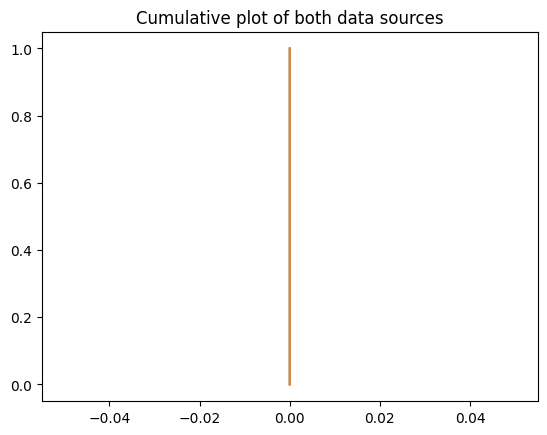

In [68]:
data_1 = df_dropna(df_2303["ULTXCO"],0.99)
data_2 = df_dropna(df_2302["ULTXCO"],0.99)
x = np.sort(data_1)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y)
x2 = np.sort(data_2)
y2 = np.arange(len(x2))/float(len(x2))
plt.plot(x2, y2)
plt.title('Cumulative plot of both data sources')
plt.show()

## Mann-Whitney

In [21]:
def Mann_Whitney_Test(new_df,old_df,column,threshold,na_action=df_dropna,por=0):
    u_statistic, p_value = mannwhitneyu(na_action(new_df[column],por), na_action(old_df[column],por))
    if p_value < threshold:
        return("No cumple",u_statistic, p_value)
    return("Cumple",u_statistic, p_value)


### MTOREV

In [22]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"MTOREV",0.05)

# Print the results

print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 3087722201550.5
P-value: 0.9950578062355421


### SALMD

In [23]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"SALMD",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: No Cumple
U statistic: 411564500510.5
P-value: 2.514248769429729e-06


### GASTO

In [24]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"GASTO",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 4067435878044.5
P-value: 0.673379873133851


### ULTXCO

In [25]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"ULTXCO",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 2850251302382.0
P-value: 1.0


### MTOVENC

In [26]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"MTOVENC",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 4065536614174.0
P-value: 0.1733179811086364


### TASAINT

In [27]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"TASAINT",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: No Cumple
U statistic: 3589420254157.0
P-value: 6.406484047016319e-07


### SPROM

In [28]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"SPROM",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 412613876675.0
P-value: 0.07254269011584882


### MTOCAST

In [29]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"MTOCAST",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 4070096759792.0
P-value: 0.3589258163150938


### CONTINGENTE

In [30]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"CONTINGENTE",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 1308047177614.0
P-value: 0.34061324045245256


In [62]:
def Tester(new_df,old_df,column,threshold,na_action=df_dropna,por = 0):
    KS_results = list(Kolmogorov_test(new_df,old_df,column,threshold,na_action,por))
    MW_results = list(Mann_Whitney_Test(new_df,old_df,column,threshold,na_action,por))
    return {"KS":KS_results,"MW":MW_results}



